Tp Calibrage Luc Anchling Timothée Teyssier

Importation des librairies utiles

In [30]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from plotly import express as px

Lecture des images "mire1.png" et "mire2.png"

In [31]:
image1 = cv2.imread('mire_1.png')
image2 = cv2.imread('mire_2.png')

Récupération des intersections des cases des deux mires

In [32]:
ret1, corners1 = cv2.findChessboardCorners(image1,(11,8))
ret2, corners2 = cv2.findChessboardCorners(image2,(11,8))   #number of points it has to find
print("longueur nombre intersections image 1: ",len(corners1))
print(corners1)
print("longueur nombre intersections image 2: ",len(corners2))

longueur nombre intersections image 1:  88
[[[569.15533  387.40332 ]]

 [[519.4816   385.9438  ]]

 [[470.1172   384.61594 ]]

 [[419.7884   383.28775 ]]

 [[369.6076   382.3157  ]]

 [[318.4884   381.37213 ]]

 [[267.53342  380.38293 ]]

 [[215.46744  379.35266 ]]

 [[162.99219  378.62924 ]]

 [[109.80231  378.0184  ]]

 [[ 54.955513 377.48337 ]]

 [[565.95764  336.73398 ]]

 [[517.60333  335.4439  ]]

 [[468.5475   333.93002 ]]

 [[419.5133   332.52423 ]]

 [[369.70242  331.18527 ]]

 [[319.72803  330.18427 ]]

 [[269.2293   328.9239  ]]

 [[218.49387  328.02762 ]]

 [[166.82867  326.98392 ]]

 [[114.38393  325.8484  ]]

 [[ 60.66472  325.21472 ]]

 [[563.5097   288.04315 ]]

 [[515.45215  286.43924 ]]

 [[467.4098   284.9126  ]]

 [[418.7464   283.35608 ]]

 [[370.15646  282.12717 ]]

 [[320.63373  280.69492 ]]

 [[271.1921   279.65094 ]]

 [[220.88191  278.4358  ]]

 [[170.5534   277.28763 ]]

 [[118.79167  275.6171  ]]

 [[ 66.35025  274.22665 ]]

 [[560.81433  240.57297 ]]

 [[51

Changement de taille des corners pour avoir que deux dimensions

In [33]:
# print(corners1.shape)
corners1_squeeze = np.squeeze(corners1, axis=1)
# print(corners2.shape)
corners2_squeeze = np.squeeze(corners2, axis=1)
# print(corners1.shape)

In [34]:
# concatenation des deux tableaux de coordonnées
coord_px = np.concatenate((corners1_squeeze, corners2_squeeze), axis=0)
print("longeur coordonnées pixels : ",len(coord_px))

longeur coordonnées pixels :  176


In [35]:
origine_2D = corners1_squeeze[0] # origine 2D = premier point du tableau corners1_squeeze intersection qui se situe en bas à gauche de l'image
print("Coordonnées de l'origine 0 : ",origine_2D)

Coordonnées de l'origine 0 :  [569.15533 387.40332]


Coordonnées des intersections en mm

In [36]:
coord_mm = []
Nx,Ny = 11,8
x,y=0,0
for z in [0,100]:    
    for y in range(Ny):
        for x in range(Nx):
            coord_mm.append(np.array([x*-20,y*-20,z]).astype(np.float32))
coord_mm = np.array(coord_mm)
print("shape coordonnées en mm des intersections : ",coord_mm.shape)
print("Coordonnées en mm des intersections : ",coord_mm)

shape coordonnées en mm des intersections :  (176, 3)
Coordonnées en mm des intersections :  [[   0.    0.    0.]
 [ -20.    0.    0.]
 [ -40.    0.    0.]
 [ -60.    0.    0.]
 [ -80.    0.    0.]
 [-100.    0.    0.]
 [-120.    0.    0.]
 [-140.    0.    0.]
 [-160.    0.    0.]
 [-180.    0.    0.]
 [-200.    0.    0.]
 [   0.  -20.    0.]
 [ -20.  -20.    0.]
 [ -40.  -20.    0.]
 [ -60.  -20.    0.]
 [ -80.  -20.    0.]
 [-100.  -20.    0.]
 [-120.  -20.    0.]
 [-140.  -20.    0.]
 [-160.  -20.    0.]
 [-180.  -20.    0.]
 [-200.  -20.    0.]
 [   0.  -40.    0.]
 [ -20.  -40.    0.]
 [ -40.  -40.    0.]
 [ -60.  -40.    0.]
 [ -80.  -40.    0.]
 [-100.  -40.    0.]
 [-120.  -40.    0.]
 [-140.  -40.    0.]
 [-160.  -40.    0.]
 [-180.  -40.    0.]
 [-200.  -40.    0.]
 [   0.  -60.    0.]
 [ -20.  -60.    0.]
 [ -40.  -60.    0.]
 [ -60.  -60.    0.]
 [ -80.  -60.    0.]
 [-100.  -60.    0.]
 [-120.  -60.    0.]
 [-140.  -60.    0.]
 [-160.  -60.    0.]
 [-180.  -60.    0.]
 [-2

In [37]:
#centre optique se situant au centre de l'image 1
print("shape de la mire 1 : ",image1.shape)
i1 = image1.shape[1]/2
print("Coordonée i1 du centre d'origine O en x : ",i1)
i2 = image1.shape[0]/2
print("Coordonée i2 du centre d'origine O en y : ",i2)

shape de la mire 1 :  (480, 640, 3)
Coordonée i1 du centre d'origine O en x :  320.0
Coordonée i2 du centre d'origine O en y :  240.0


Résolution du problème A*L = U1

In [38]:
#création de la matrice A de taille (Nx7) et le vecteur unitaire U1 de taille (Nx1)
Nx = 8
Ny = 11
A = np.zeros((Nx*Ny*2,7))
U1 = np.zeros((Nx*Ny*2,1))
coord_px_center = coord_px-np.array([i1,i2])
U1=coord_px_center[:,0]
for i in range(coord_mm.shape[0]):
    A[i,0] = np.multiply(coord_px_center[i,1],coord_mm[i,0])
    A[i,1] = np.multiply(coord_px_center[i,1],coord_mm[i,1])
    A[i,2] = np.multiply(coord_px_center[i,1],coord_mm[i,2])
    A[i,3] = coord_px_center[i,1]
    A[i,4] = np.multiply(-coord_px_center[i,0],coord_mm[i,0])
    A[i,5] = np.multiply(-coord_px_center[i,0],coord_mm[i,1])
    A[i,6] = np.multiply(-coord_px_center[i,0],coord_mm[i,2])

print("Matrice A (shape): ",A.shape)
print("Matrice U1 (shape): ",U1.shape)
print("Matrice A : ",A)
print("Matrice U1 : ",U1)

Matrice A (shape):  (176, 7)
Matrice U1 (shape):  (176,)
Matrice A :  [[     0.              0.              0.         ...     -0.
      -0.             -0.        ]
 [ -2918.87573242      0.              0.         ...   3989.63256836
      -0.             -0.        ]
 [ -5784.63745117      0.              0.         ...   6004.6875
      -0.             -0.        ]
 ...
 [ 18694.66064453  16357.82806396 -11684.16290283 ... -19732.22900391
  -17265.70037842  12332.64312744]
 [ 21401.69265747  16645.76095581 -11889.82925415 ... -28893.76831055
  -22472.9309082   16052.09350586]
 [ 24129.21600342  16890.45120239 -12064.60800171 ... -39593.5760498
  -27715.50323486  19796.7880249 ]]
Matrice U1 :  [ 249.15533447  199.48162842  150.1171875    99.78839111   49.60760498
   -1.51159668  -52.46658325 -104.53256226 -157.0078125  -210.19769287
 -265.044487    245.9576416   197.60333252  148.54748535   99.51330566
   49.7024231    -0.27197266  -50.77069092 -101.50613403 -153.17132568
 -205.616

In [39]:
#Résolution du système linéaire A*L=U1
L = np.linalg.pinv(A)@U1
print("Matrice L (shape): ",L.shape)
print("Matrice L : ",L)

Matrice L (shape):  (7,)
Matrice L :  [ 1.70207072e-02 -3.31015065e-04 -1.64681120e-03  1.68961928e+00
  5.48675564e-04  1.65534868e-02  3.17505736e-03]


Récupération d'une partie des paramètres extrasèques de la caméra grâce à la matrice L

In [40]:
o2c = 1/np.sqrt(L[4]**2+L[5]**2+L[6]**2)
beta = o2c*np.sqrt(L[0]**2+L[1]**2+L[2]**2)
o1c = (L[3]*o2c)/beta
r11 = L[0]*o2c/beta
r12 = L[1]*o2c/beta
r13 = L[2]*o2c/beta
r21 = L[4]*o2c
r22 = L[5]*o2c
r23 = L[6]*o2c
print("o2c : ",o2c)
print("beta : ",beta)
print("o1c : ",o1c)
print("r11 : ",r11)
print("r12 : ",r12)
print("r13 : ",r13)
print("r21 : ",r21)
print("r22 : ",r22)
print("r23 : ",r23)

o2c :  59.29734331972601
beta :  1.014185731188579
o1c :  98.78854650036989
r11 :  0.9951655670843206
r12 :  -0.019353766638297378
r13 :  -0.09628564693999116
r21 :  0.03253500331713527
r22 :  0.9815777869961524
r23 :  0.1882724664811354


In [41]:
vectoriel = np.cross([r11,r12,r13],[r21,r22,r23])
print("Vecteur (r31,r32,r33)",vectoriel)
r31 = vectoriel[0]
r32 = vectoriel[1]
r33 = vectoriel[2]
print("r31 : ",r31)
print("r32 : ",r32)
print("r33 : ",r33)

Vecteur (r31,r32,r33) [ 0.09086807 -0.19049493  0.97746209]
r31 :  0.09086807086215681
r32 :  -0.190494929714648
r33 :  0.9774620898951746


Récupération des angles de rotation pour passer du repère objet au repère caméra

In [42]:
phi = -np.arctan(r23/r33)
gamma = -np.arctan(r12/r11)
omega = np.arctan(r13/(-r23*np.sin(phi)+r33*np.cos(phi)))
print("phi : ",phi)
print("gamma : ",gamma)
print("omega : ",omega)


phi :  -0.19028324400701768
gamma :  0.01944533438602802
omega :  -0.09642781302237262


Résolution du problème B*(o3c,f2)' = R

In [43]:
B = np.zeros((Nx*Ny*2,2))
R = np.zeros((Nx*Ny*2,1))
for i in range(coord_mm.shape[0]):
    B[i,0] = coord_px_center[i,1]
    B[i,1] = -(r21*coord_mm[i,0]+r22*coord_mm[i,1]+r23*coord_mm[i,2]+o2c)
    R[i,0] = -coord_px_center[i,1]*(r31*coord_mm[i,0]+r32*coord_mm[i,1]+r33*coord_mm[i,2])
print("Matrice B (shape) : ",B.shape)
print("Matrice R (shape) : ",R.shape)
print("Matrice B :",B)
print("Matrice R :",R)

Matrice B (shape) :  (176, 2)
Matrice R (shape) :  (176, 1)
Matrice B : [[ 1.47403320e+02 -5.92973433e+01]
 [ 1.45943787e+02 -5.86466433e+01]
 [ 1.44615936e+02 -5.79959432e+01]
 [ 1.43287750e+02 -5.73452431e+01]
 [ 1.42315704e+02 -5.66945431e+01]
 [ 1.41372131e+02 -5.60438430e+01]
 [ 1.40382935e+02 -5.53931429e+01]
 [ 1.39352661e+02 -5.47424429e+01]
 [ 1.38629242e+02 -5.40917428e+01]
 [ 1.38018402e+02 -5.34410427e+01]
 [ 1.37483368e+02 -5.27903427e+01]
 [ 9.67339783e+01 -3.96657876e+01]
 [ 9.54439087e+01 -3.90150875e+01]
 [ 9.39300232e+01 -3.83643874e+01]
 [ 9.25242310e+01 -3.77136874e+01]
 [ 9.11852722e+01 -3.70629873e+01]
 [ 9.01842651e+01 -3.64122872e+01]
 [ 8.89238892e+01 -3.57615872e+01]
 [ 8.80276184e+01 -3.51108871e+01]
 [ 8.69839172e+01 -3.44601870e+01]
 [ 8.58483887e+01 -3.38094870e+01]
 [ 8.52147217e+01 -3.31587869e+01]
 [ 4.80431519e+01 -2.00342318e+01]
 [ 4.64392395e+01 -1.93835318e+01]
 [ 4.49125977e+01 -1.87328317e+01]
 [ 4.33560791e+01 -1.80821316e+01]
 [ 4.21271667e+01 

In [44]:
#Résolution de B(o3c,f2) = R
o3c,f2 = np.linalg.pinv(B)@R
print("o3c : ",o3c)
print("f2 : ",f2)

o3c :  [331.59970173]
f2 :  [805.54332638]


Récupération des facteurs d'échelle s1 et s2

In [45]:
f = 4
s2 = f/f2
f1 = beta*f2
s1 = s2/beta
print("focale : ", f)
print("s1 : ",s1)
print("s2 : ",s2)
print("f1 : ",f1)
print("f2 : ",f2)

focale :  4
s1 :  [0.00489614]
s2 :  [0.00496559]
f1 :  [816.97054746]
f2 :  [805.54332638]


In [46]:
#taille capteur webcam en mm
w = s1*image1.shape[1]
h = s2*image1.shape[0]
print("taille du capteur webcam en mm pour la largeur : ",w)
print("taille du capteur webcam en mm pour la hauteur : ",h)

taille du capteur webcam en mm pour la largeur :  [3.1335279]
taille du capteur webcam en mm pour la hauteur :  [2.38348446]


Projection des coordonnées objet 3D dans le repère image

In [47]:
f1=f/s1[0]
f2 = f/s2[0]
print("f1 : ",f1)
print("f2 : ",f2)
Mint = np.array([[f1,0,i1,0],[0,f2,i2,0],[0,0,0,1]])
Mext = np.array([[r11,r12,r13,o1c],[r21,r22,r23,o2c],[r31,r32,r33,o3c[0]],[0,0,0,1]])
print("Matrice intrasèque : ",Mint.shape)
print("Matrice extrasèque : ",Mext.shape)
M= Mint@Mext
print("Matrice M = Mint * Mext : ",M.shape, M)
alpha = r31*coord_mm[:,0]+r32*coord_mm[:,1]+r33*coord_mm[:,2]+o3c
print("alpha", alpha.shape, alpha[0])
quedesuns = np.ones((coord_mm.shape[0],1)) #vecteur de 1 pour ajouter une colonne de 1 à coord_mm pour
                                            # avoir des coordonnées homogènes
coord_mm_4d = np.concatenate((coord_mm,quedesuns),axis=1)
aU = []
for i in range(coord_mm_4d.shape[0]):
    aUi = M@coord_mm_4d[i,:]
    Ui = aUi/alpha[i]
    aU.append(Ui)
aU = np.array(aU)
print("Matrice contenant les coordonnées en 2D multipliées par alpha : ",aU.shape, aU)

f1 :  816.9705474645971
f2 :  805.5433263758753
Matrice intrasèque :  (3, 4)
Matrice extrasèque :  (4, 4)
Matrice M = Mint * Mext :  (3, 4) [[ 8.42098741e+02 -7.67698348e+01  2.34125331e+02  1.86819237e+05]
 [ 4.80166918e+01  7.44984653e+02  3.86252530e+02  1.27350508e+05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
alpha (176,) 331.599701726111
Matrice contenant les coordonnées en 2D multipliées par alpha :  (176, 3) [[5.63387833e+02 3.84048921e+02 3.01568426e-03]
 [5.15422574e+02 3.83253311e+02 3.03230306e-03]
 [4.66925732e+02 3.82448883e+02 3.04910604e-03]
 [4.17888421e+02 3.81635491e+02 3.06609629e-03]
 [3.68301556e+02 3.80812983e+02 3.08327694e-03]
 [3.18155848e+02 3.79981205e+02 3.10065122e-03]
 [2.67441793e+02 3.79140000e+02 3.11822241e-03]
 [2.16149677e+02 3.78289207e+02 3.13599390e-03]
 [1.64269557e+02 3.77428660e+02 3.15396910e-03]
 [1.11791266e+02 3.76558192e+02 3.17215156e-03]
 [5.87043965e+01 3.75677629e+02 3.19054489e-03]
 [5.61566020e+02 3.3526415

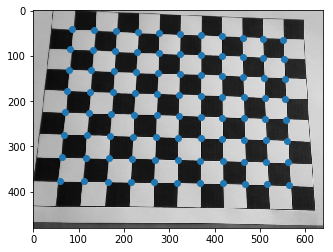

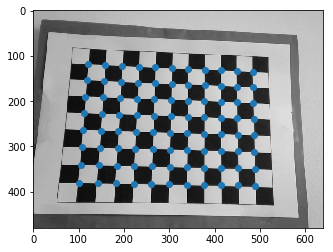

In [48]:
plt.figure()
plt.imshow(image1)
plt.scatter(aU[:88,0],aU[:88,1])
plt.show()
plt.figure()
plt.imshow(image2)
plt.scatter(aU[88:,0],aU[88:,1])
plt.show()


### Utilisation de la fonction cv2.calibrateCamera()

In [49]:
M_cam = Mint[:3,:3]
M_cam[2,2] = 1
print(M_cam)

[[816.97054746   0.         320.        ]
 [  0.         805.54332638 240.        ]
 [  0.           0.           1.        ]]


In [50]:
def cv2Calibrate(coord_px,coord_mm,M_int,h,w):
    # mise en forme des données pour la fonction cv2.calibrateCamera
    objpoints = [coord_mm] 
    imgpoints = [coord_px]  

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (h,w),
                                                       M_int, None, None, 
                                                       flags=cv2.CALIB_USE_INTRINSIC_GUESS)
    
    proj = []
    for i in range(len(objpoints)):
        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
        proj.append(imgpoints2)

    return proj

In [51]:
proj_cv2 = cv2Calibrate(coord_px,coord_mm,M_cam,image1.shape[1],image1.shape[0])

### Erreurs des projections (comparaison des méthodes)

In [52]:
error_proj = np.linalg.norm(aU[:,:2]-coord_px)/len(coord_px)
error_cv2 = np.linalg.norm(np.squeeze(proj_cv2[0])-coord_px)/len(coord_px)

print("Erreur Tsai = {}".format(error_proj))
print("Erreur CV2 = {}".format(error_cv2))

Erreur Tsai = 0.13072627151227587
Erreur CV2 = 0.0441743325103413


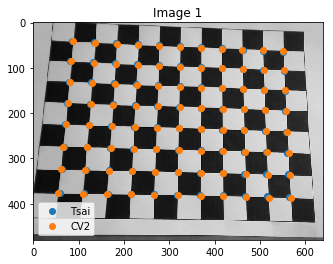

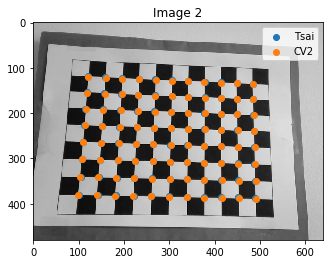

In [53]:
plt.figure()
plt.title('Image 1')
plt.imshow(image1)
plt.scatter(aU[:88,0],aU[:88,1])
plt.scatter(proj_cv2[0][:88,:,0],proj_cv2[0][:88,:,1])
plt.legend(['Tsai','CV2'])

plt.figure()
plt.title('Image 2')
plt.imshow(image2)
plt.scatter(aU[88:,0],aU[88:,1])
plt.scatter(proj_cv2[0][88:,:,0],proj_cv2[0][88:,:,1])
plt.legend(['Tsai','CV2'])
plt.show()